FeatureNotFound: Couldn't find a tree builder with the features you requested: lxml-xml. Do you need to install a parser library?

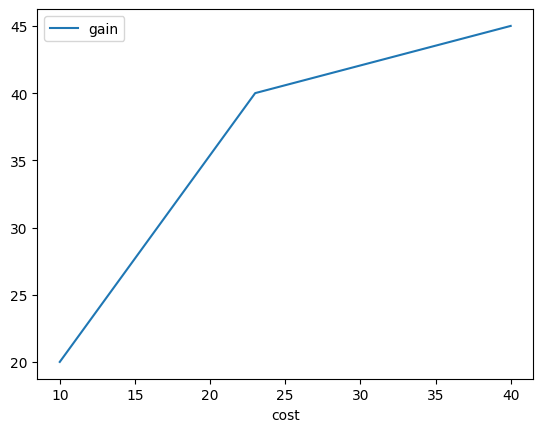

In [1]:
import pandas as pd 
from datetime import datetime as dt
from bakepy import Report

r = Report()

r.recipe("title", "Example BakePy Report")

r.recipe("markdown",
f"""
### {dt.now().strftime("%Y-%m-%d")}
""")
#We want to center text in the current column.
r.set_col_cls("text-center")

#A separator
r.recipe("separator")

#Some variables
a = 4
color = "blue"
l = ["red", 3, False]
#Replacing variables in generated text.
r.recipe("markdown",
f"""
We can add markdown and use the power of Python to mix:

- Variables, like a={a}
- Conditional formatting, like adding the <span style="color:{color}">color {color}</span>
- And even directly transform Python objects beyond things like the list: {l}
"""
)
#Now we add some more text, this time in the same row we were at before.
r.add("<h2> See some examples below! </h2>", new_row = False)
#We can even add items to the same column!
r.recipe("spacer", level = 3, new_col = False)
r.add(
"""
For example, Pandas Dataframes and Matplotlib Figures
""", new_col = False)

#Adding a DataFrame in a new line.
data = {
  "cost": [10, 23, 40],
  "gain": [20, 40, 45]
}
df = pd.DataFrame(data)

r.add(df, index = False, caption = "This is a table")
#We set row items to be aligned at the center.
r.set_row_cls("align-items-center")

#Adding a plot on the same line.
r.add(df.plot(x="cost", y="gain"), size=6, caption = "This is a figure", new_row=False)
#Saving the report

#An image
r.recipe("img",
"https://upload.wikimedia.org/wikipedia/en/thumb/8/80/Wikipedia-logo-v2.svg/800px-Wikipedia-logo-v2.svg.png",
size = 2,
caption = "Adding an image from the Internet.")

r.save_html("example_report.html")

In [2]:
r.save_html("example_report.html")

### Information about recipes:

In [3]:
r.get_recipes()

dict_keys(['separator', 'img', 'markdown', 'title', 'spacer'])

In [4]:
r.get_recipe_info("img")

Help on function _get_img in module bakepy.recipes:

_get_img(url, caption=None)
    Adds an image from a path.
    
    Parameters
    ----------
    url: str
        The path (local or remote) to the image file.
    caption: str, default = None
        The caption for the image.



### Information about renderers:

In [5]:
r.get_renderers()

dict_keys([<class 'object'>, <class 'str'>, <class 'bakepy.html.HTMLElement'>, <class 'pandas.core.frame.DataFrame'>, <class 'matplotlib.artist.Artist'>])

In [6]:
r.get_renderer_info(df, verbose=True)

Found a renderer for the type <class 'pandas.core.frame.DataFrame'>.
Help on function _get_pandas_html in module bakepy.rendering:

_get_pandas_html(df, caption=None, classes=['table', 'table-bordered'], justify='left', index=True, **options)
    Rendering function for pandas dataframes.
    
    Parameters
    ----------
    df: DataFrame
        The dataframe to render.
    caption: str, default = None
        The table's caption.
    classes: list, default = ["table", "table-bordered"]
        A list of classes to apply to the HTML table generated.
    justify: str, default="left"
        The justification for the table's text.
    index: bool, default=True
        If True, adds the index to the HTML render of the dataframe.
    Returns
    ----------
    repr: str
        An HTML string.



In [7]:
r.get_renderer_info(1, verbose=True)

Found no associated renderer for the type <class 'int'>.
Found a renderer for the type <class 'object'>.
Help on function _default_html_conversion in module bakepy.rendering:

_default_html_conversion(element, **_options)
    A default rendering function for any unimplemented types. Returns the object's string representation.
    
    Parameters
    ----------
    element: Object
        The object to render.
    _options: dict
        Unused. Kept for compatibility with get_html()
    Returns
    ----------
    repr: str
        An HTML string.



In [14]:
%load_ext bakepy

The bakepy extension is already loaded. To reload it, use:
  %reload_ext bakepy


In [16]:
%bake

Called as line magic
Namespace(caption=None, col=None, container=None, copy=False, html=False, latex=False, new_col=True, new_row=True, overwrite=False, report=None, row=None, size=None)
My results are:


TypeError: eval() arg 1 must be a string, bytes or code object

In [35]:
from IPython.core.magic import (Magics, magics_class, line_magic,
                                cell_magic, line_cell_magic, needs_local_scope)

from IPython.core.magic_arguments import (argument, magic_arguments,
    parse_argstring)

import markdown

def strparse(val):
    """
    Parse a string with support for spaces.
    """
    if val.startswith('"') and val.endswith('"'):
        #Using double-quotations
        return val.strip('"')
    if val.startswith("'") and val.endswith("'"):
        #Using single quotations
        return val.strip("'")
    return val

def boolparse(val):
    """
    Parse a Boolean value.
    """
    val = strparse(val).lower()
    if val in ["y", "yes", "true", "t"]:
        return True
    return False

def idparse(val):
    """
    Parse a string that can be used as a Python identifier.
    """
    val = strparse(val)
    if val.isidentifier():
        return val
    raise Exception("Invalid Report name. Must be a valid identifier name.")

@magics_class
class Bake2ReportMagic(Magics):
    #Add things to the report
    @needs_local_scope
    @magic_arguments()
    @argument('-R', '--report', default=None, type=idparse, help='The name of the report to use. If it does not exist, it is created. If None, uses the current active report. Must be a valid Python identifier name.')
    @argument('-C', '--container', default=None, type=strparse, help='The name of the container to use. If it does not exist, it is created.')
    @argument('-r', '--row', default=None, type=int, help='The row position to use. If none provided, uses the current row.')
    @argument('-c', '--col', default=None, type=int, help='The position to take in the row. If none provided, inserts at the end of the current row.')
    @argument('-nr', '--new_row', default=True, type=boolparse, help='Whether to use the active row or create a new one.')
    @argument('-nc', '--new_col', default=True, type=boolparse, help='Whether to use the active col or create a new one.')
    @argument('-s', '--size', default=None, type=int, help='The size of the column in the row.')
    @argument('-S', '--special', default=None, type=boolparse, help='Whether to use a special format (recipe) for the input or not. If None, it defaults to True for string inputs and False for any other type.')
    @argument('-t', '--recipe', default="markdown", type=str, help='The recipe to use for the input.')
    @argument('-a', '--args', default={}, type=dictparse, help='Dictionary of arguments to pass to recipe.')
    @argument('-o', '--overwrite', default=False, type=boolparse, help='Whether to overwrite the given column. Only valid if col is not None.')
    @argument('-cp', '--copy', default=False, type=boolparse, help='Whether to copy the input object before inserting to the report.')
    
    @argument('-l', '--latex', default=False, type=boolparse, help='Whether to evaluate LaTeX expresions. Only valid if cell output is a string.')
    @argument('-h', '--html', default=False, type=boolparse, help='Whether to  evaluate input as raw HTML rather than markdown. Only valid if cell output is a string.')
    @argument('-cap', '--caption', default=None, type=strparse, help='Caption for a DataFrame or Figure.')
    
    
    @line_cell_magic
    def bake(self, line, cell=None, local_ns=None):
        """
        IPython Magic that serves as a direct interface for adding elements to a BakePy Report.
        """
        if cell is None:
            print("Called as line magic")
        else:
            print("Called as cell magic")
        args = parse_argstring(self.bake, line)

        print(args)
        if args.report is not None:
            local_ns[args.report] = "REPORT"
        print("My results are:")
        print(markdown.markdown(eval(cell, None, local_ns)))
    
    #Set cls/sty and other things like active reports, etc...
    @needs_local_scope
    @magic_arguments()
    @argument('-R', '--report', default=None, type=idparse, help='The name of the report to use. If it does not exist, it is created. If None, uses the current active report. Must be a valid Python identifier name.')
    @argument('-C', '--container', default=None, type=strparse, help='The name of the container to use. If it does not exist, it is created.')
    @argument('-r', '--row', default=None, type=int, help='The row position to use. If none provided, uses the current row.')
    @argument('-c', '--col', default=None, type=int, help='The position to take in the row. If none provided, inserts at the end of the current row.')
    @line_cell_magic
    def bake_set(self, line, cell=None, local_ns=None):
        """
        IPython Magic that serves as a direct interface for setting operations in a BakePy Report.
        """
        if cell is None:
            print("Called as line magic")
        else:
            print("Called as cell magic")
        args = parse_argstring(self.bake, line)

        print(args)
        if args.report is not None:
            local_ns[args.report] = "REPORT"
        print("My results are:")
        print(markdown.markdown(eval(cell, None, local_ns)))
    
    #Remove reports, containers, rows, and columns
    @needs_local_scope
    @magic_arguments()
    @argument('-R', '--report', default=None, type=idparse, help='The name of the report to use. If it does not exist, it is created. If None, uses the current active report. Must be a valid Python identifier name.')
    @argument('-C', '--container', default=None, type=strparse, help='The name of the container to use. If it does not exist, it is created.')
    @argument('-r', '--row', default=None, type=int, help='The row position to use. If none provided, uses the current row.')
    @argument('-c', '--col', default=None, type=int, help='The position to take in the row. If none provided, inserts at the end of the current row.')
    @line_cell_magic
    def bake_rem(self, line, cell=None, local_ns=None):
        """
        IPython Magic that serves as a direct interface for remove operations in a BakePy Report.
        """
        if cell is None:
            print("Called as line magic")
        else:
            print("Called as cell magic")
        args = parse_argstring(self.bake, line)

        print(args)
        if args.report is not None:
            local_ns[args.report] = "REPORT"
        print("My results are:")
        print(markdown.markdown(eval(cell, None, local_ns)))

    #Save the report
    @needs_local_scope
    @magic_arguments()
    @argument('-R', '--report', default=None, type=idparse, help='The name of the report to use. If it does not exist, it is created. If None, uses the current active report. Must be a valid Python identifier name.')
    @argument('-f', '--filetype', default=None, type=strparse, help='The name of the container to use. If it does not exist, it is created.')
    @argument('-p', '--path', default=None, type=strparse, help='The row position to use. If none provided, uses the current row.')
    @argument('-e', '--embed', default=None, type=boolparse, help='The position to take in the row. If none provided, inserts at the end of the current row.')
    @line_cell_magic
    def bake_save(self, line, cell=None, local_ns=None):
        """
        IPython Magic that serves as a direct interface for saving operations in a BakePy Report.
        """
        if cell is None:
            print("Called as line magic")
        else:
            print("Called as cell magic")
        args = parse_argstring(self.bake, line)

        print(args)
        if args.report is not None:
            local_ns[args.report] = "REPORT"
        print("My results are:")
        print(markdown.markdown(eval(cell, None, local_ns)))

NameError: name 'dictparse' is not defined

In [ ]:
def dictparse(val):
    eval(val, None, local_ns)

In [18]:
from IPython.core.magic import (Magics, magics_class, line_magic,
                                cell_magic, line_cell_magic, needs_local_scope)

from IPython.core.magic_arguments import (argument, magic_arguments,
    parse_argstring)

In [40]:
from IPython.core.magic import (register_line_magic, register_cell_magic,
                                register_line_cell_magic)


def strparse(val):
    """
    Parse a string with support for spaces.
    """
    if val.startswith('"') and val.endswith('"'):
        #Using double-quotations
        return val.strip('"')
    if val.startswith("'") and val.endswith("'"):
        #Using single quotations
        return val.strip("'")
    return val

def boolparse(val):
    """
    Parse a Boolean value.
    """
    val = strparse(val).lower()
    if val in ["y", "yes", "true", "t"]:
        return True
    return False

def idparse(val):
    """
    Parse a string that can be used as a Python identifier.
    """
    val = strparse(val)
    if val.isidentifier():
        return val
    raise Exception("Invalid Report name. Must be a valid identifier name.")

@needs_local_scope
@magic_arguments()
@argument('-a', '--args', default={}, type=strparse, help='Help')
@register_line_magic
def lmagic(line, local_ns=None):
    "my line magic"
    
    args = parse_argstring(lmagic, line)
    arg_dict = eval(args.args, None, local_ns)
    print(type(arg_dict))
    return line, arg_dict

@register_cell_magic
def cmagic(line, cell):
    "my cell magic"
    return line, cell

@register_line_cell_magic
def lcmagic(line, cell=None):
    "Magic that works both as %lcmagic and as %%lcmagic"
    if cell is None:
        print("Called as line magic")
        return line
    else:
        print("Called as cell magic")
        return line, cell

In [41]:
dict

dict

In [43]:
a = 2323232

In [44]:
%lmagic -a {"caption":a}

<class 'dict'>


('-a {"caption":a}', {'caption': 2323232})